# About Dataset
This dataset contains information about a sample of over 100 people across the world. The data includes the following informations:

Age: The age of the person in years.

Gender: The gender of the person (male or female).

Income: The annual income of the person in US dollars.

Education: The highest level of education completed by the person.

Marital Status: The marital status of the person (single, married, divorced, or widowed).

Number of Children: The number of children the person has.

Home Ownership: Whether the person owns their home or rents it.

Credit Score: The credit score of the person, which is a measure of their creditworthiness.

## Source and link
Source: Kaggle

Link: https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset


Author: Bao Thai

# Credit Score Classification

## Import needed libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

## Loading Dataset

In [2]:
df = pd.read_csv('C:/Users/Admin/Desktop/Projects/Credit Score Classification/Credit Score Classification Dataset.csv')
df_original = df.copy()
df_original.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
5,50,Male,150000,Master's Degree,Married,0,Owned,High
6,26,Female,40000,Associate's Degree,Single,0,Rented,Average
7,31,Male,60000,Bachelor's Degree,Single,0,Rented,Average
8,36,Female,80000,Master's Degree,Married,2,Owned,High
9,41,Male,105000,Doctorate,Single,0,Owned,High


## Explore Data

In [16]:
df_original.shape

(164, 8)

In [17]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [18]:
df_original.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [19]:
df_original.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [20]:
df_original.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10520\2946492221.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_original.corr()


,Age,Income,Number of Children
Age,1.000000,0.699464,0.055390
Income,0.699464,1.000000,0.084547
Number of Children,0.055390,0.084547,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_10520\434348305.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_original.corr(), annot = True, cmap = 'coolwarm')


Text(0.5, 1.0, 'Correlation between variables')

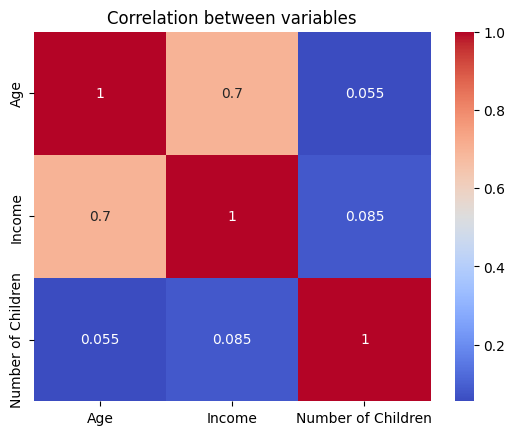

In [29]:
sns.heatmap(df_original.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation between variables')

Heatmap shows that there is a high positive correlation between Age and Income

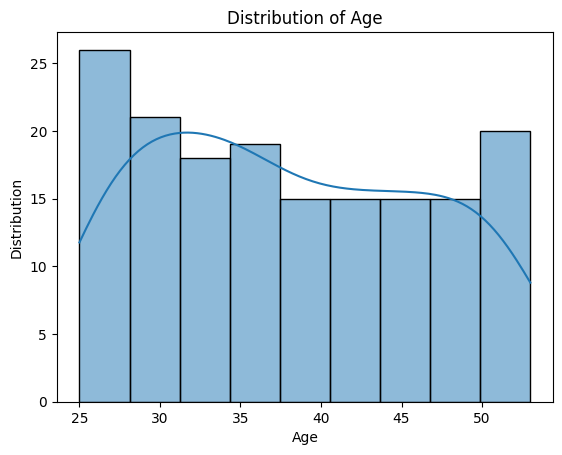

In [40]:
sns.histplot(df_original, x = df_original['Age'], kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show()

In [47]:
df_original['Gender'].value_counts()

Female    86
Male      78
Name: Gender, dtype: int64

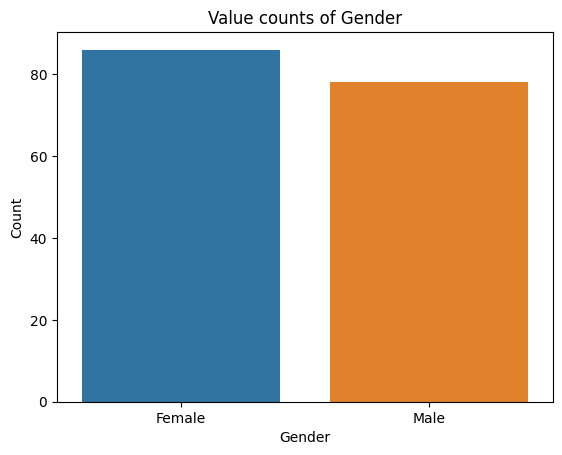

In [52]:
sns.barplot (x = df_original['Gender'].unique(), y = df_original['Gender'].value_counts())
plt.title('Value counts of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

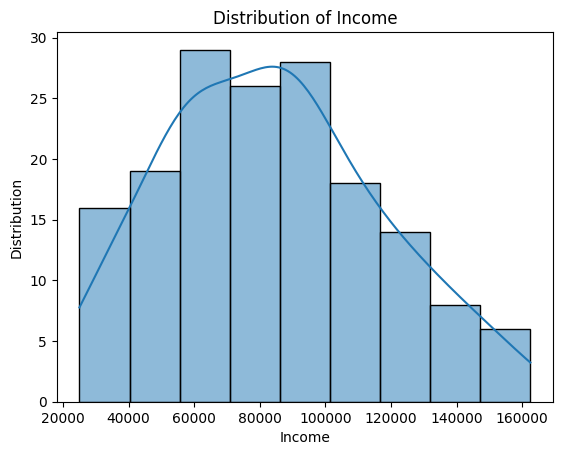

In [54]:
sns.histplot(df_original, x = df_original['Income'], kde = True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Distribution')
plt.show()

In [94]:
Education = df_original['Education'].value_counts()
Education

Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: Education, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, "Bachelor's Degree"),
  Text(1, 0, "Master's Degree"),
  Text(2, 0, 'Doctorate'),
  Text(3, 0, 'High School Diploma'),
  Text(4, 0, "Associate's Degree")])

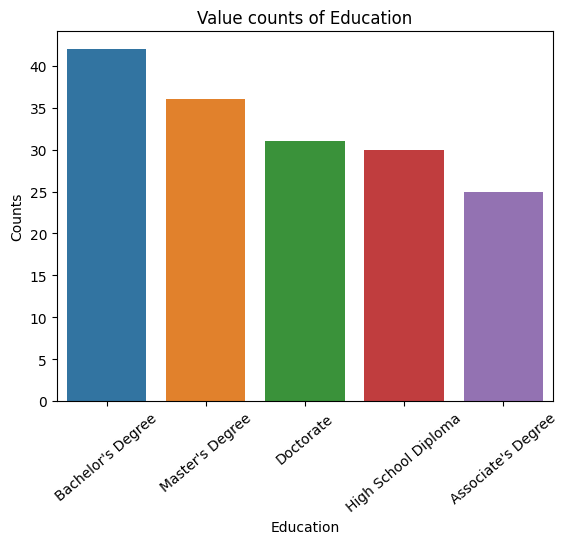

In [101]:
sns.barplot(x = Education.index, y = Education)
plt.title('Value counts of Education')
plt.xlabel('Education')
plt.ylabel('Counts')
plt.xticks(rotation = 40)

In [86]:
Edu_by_Gender = df_original['Education'].groupby(df_original['Gender']).value_counts()
Edu_by_Gender = Edu_by_Gender.reset_index(name = 'Count')
Edu_by_Gender

,Gender,Education,Count
0,Female,Bachelor's Degree,30
1,Female,Doctorate,25
2,Female,High School Diploma,15
3,Female,Associate's Degree,10
4,Female,Master's Degree,6
5,Male,Master's Degree,30
6,Male,Associate's Degree,15
7,Male,High School Diploma,15
8,Male,Bachelor's Degree,12
9,Male,Doctorate,6


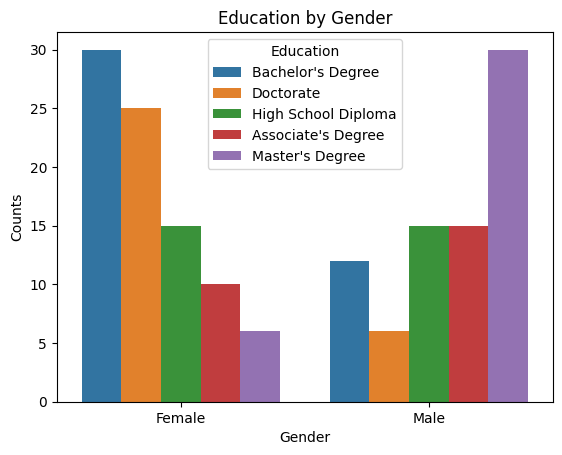

In [104]:
sns.barplot(x = Edu_by_Gender['Gender'], y = Edu_by_Gender['Count'], hue = Edu_by_Gender['Education'])
plt.title('Education by Gender')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.show()

In [110]:
df_original['Marital Status'].value_counts()

Married    87
Single     77
Name: Marital Status, dtype: int64

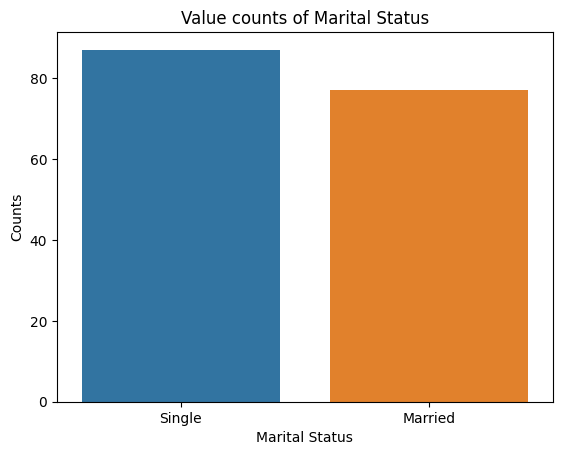

In [109]:
sns.barplot(x = df_original['Marital Status'].unique(),y = df_original['Marital Status'].value_counts())
plt.title('Value counts of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Counts')
plt.show()

In [112]:
df_original['Number of Children'].value_counts()

0    97
1    32
2    30
3     5
Name: Number of Children, dtype: int64

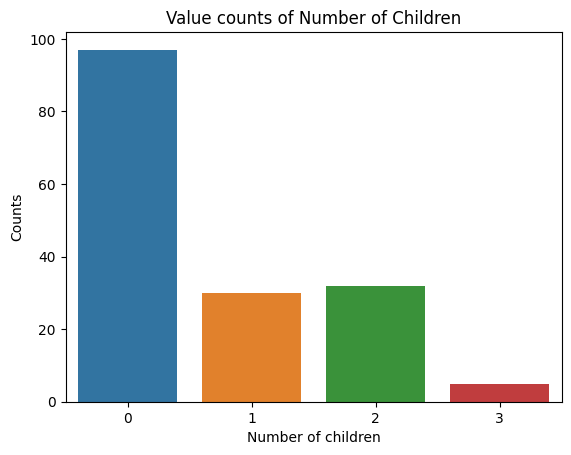

In [114]:
sns.barplot(x = df_original['Number of Children'].unique(), y = df_original['Number of Children'].value_counts())
plt.title('Value counts of Number of Children')
plt.xlabel('Number of children')
plt.ylabel('Counts')
plt.show()

In [115]:
df_original['Home Ownership'].value_counts()

Owned     111
Rented     53
Name: Home Ownership, dtype: int64

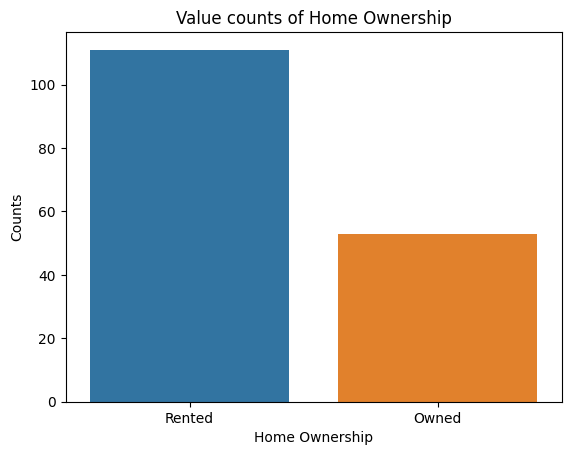

In [117]:
sns.barplot(x = df_original['Home Ownership'].unique(), y = df_original['Home Ownership'].value_counts())
plt.title('Value counts of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Counts')
plt.show()

In [118]:
df_original['Credit Score'].value_counts()

High       113
Average     36
Low         15
Name: Credit Score, dtype: int64

## 

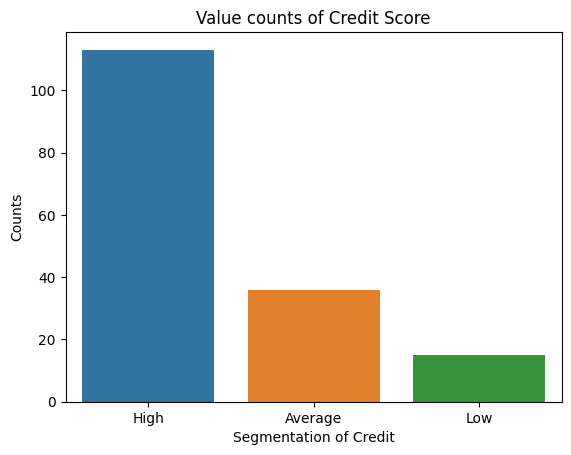

In [121]:
sns.barplot(x = df_original['Credit Score'].unique(), y = df_original['Credit Score'].value_counts())
plt.title('Value counts of Credit Score')
plt.xlabel('Segmentation of Credit')
plt.ylabel('Counts')
plt.show()

C:\Users\Admin\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


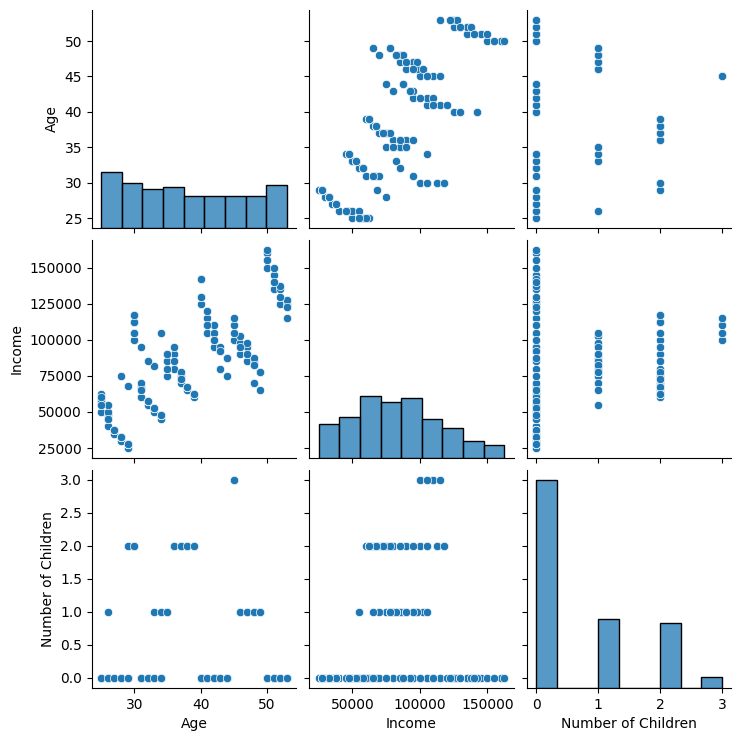

In [123]:
sns.pairplot(data = df_original)
plt.show()

## Label Encoding

In [4]:
le = LabelEncoder()
df_original['Gender'] = le.fit_transform(df_original['Gender'])
df_original['Education'] = le.fit_transform(df_original['Education'])
df_original['Marital Status'] = le.fit_transform(df_original['Marital Status'])
df_original['Home Ownership'] = le.fit_transform (df_original['Home Ownership'])
df_original['Credit Score'] = le.fit_transform(df_original['Credit Score'])
df_original.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,1
1,30,1,100000,4,0,2,0,1
2,35,0,75000,2,0,1,0,1
3,40,1,125000,3,1,0,0,1
4,45,0,100000,1,0,3,0,1


I pick out 5 categorical columns to label encoder: Gender, Education, Marital Status, Home Ownership, Credit Score.

## Correlation after encoder

<function matplotlib.pyplot.show(close=None, block=None)>

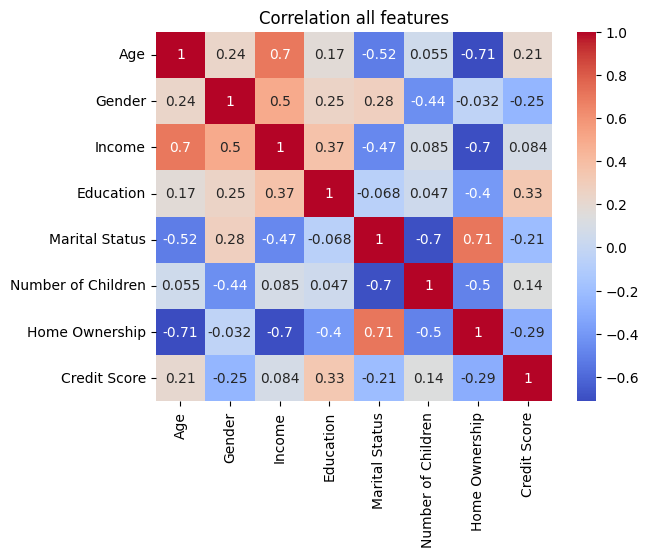

In [27]:
df_original.corr()
sns.heatmap(df_original.corr(), cmap = 'coolwarm', annot = True)
plt.title('Correlation all features')
plt.show

C:\Users\Admin\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


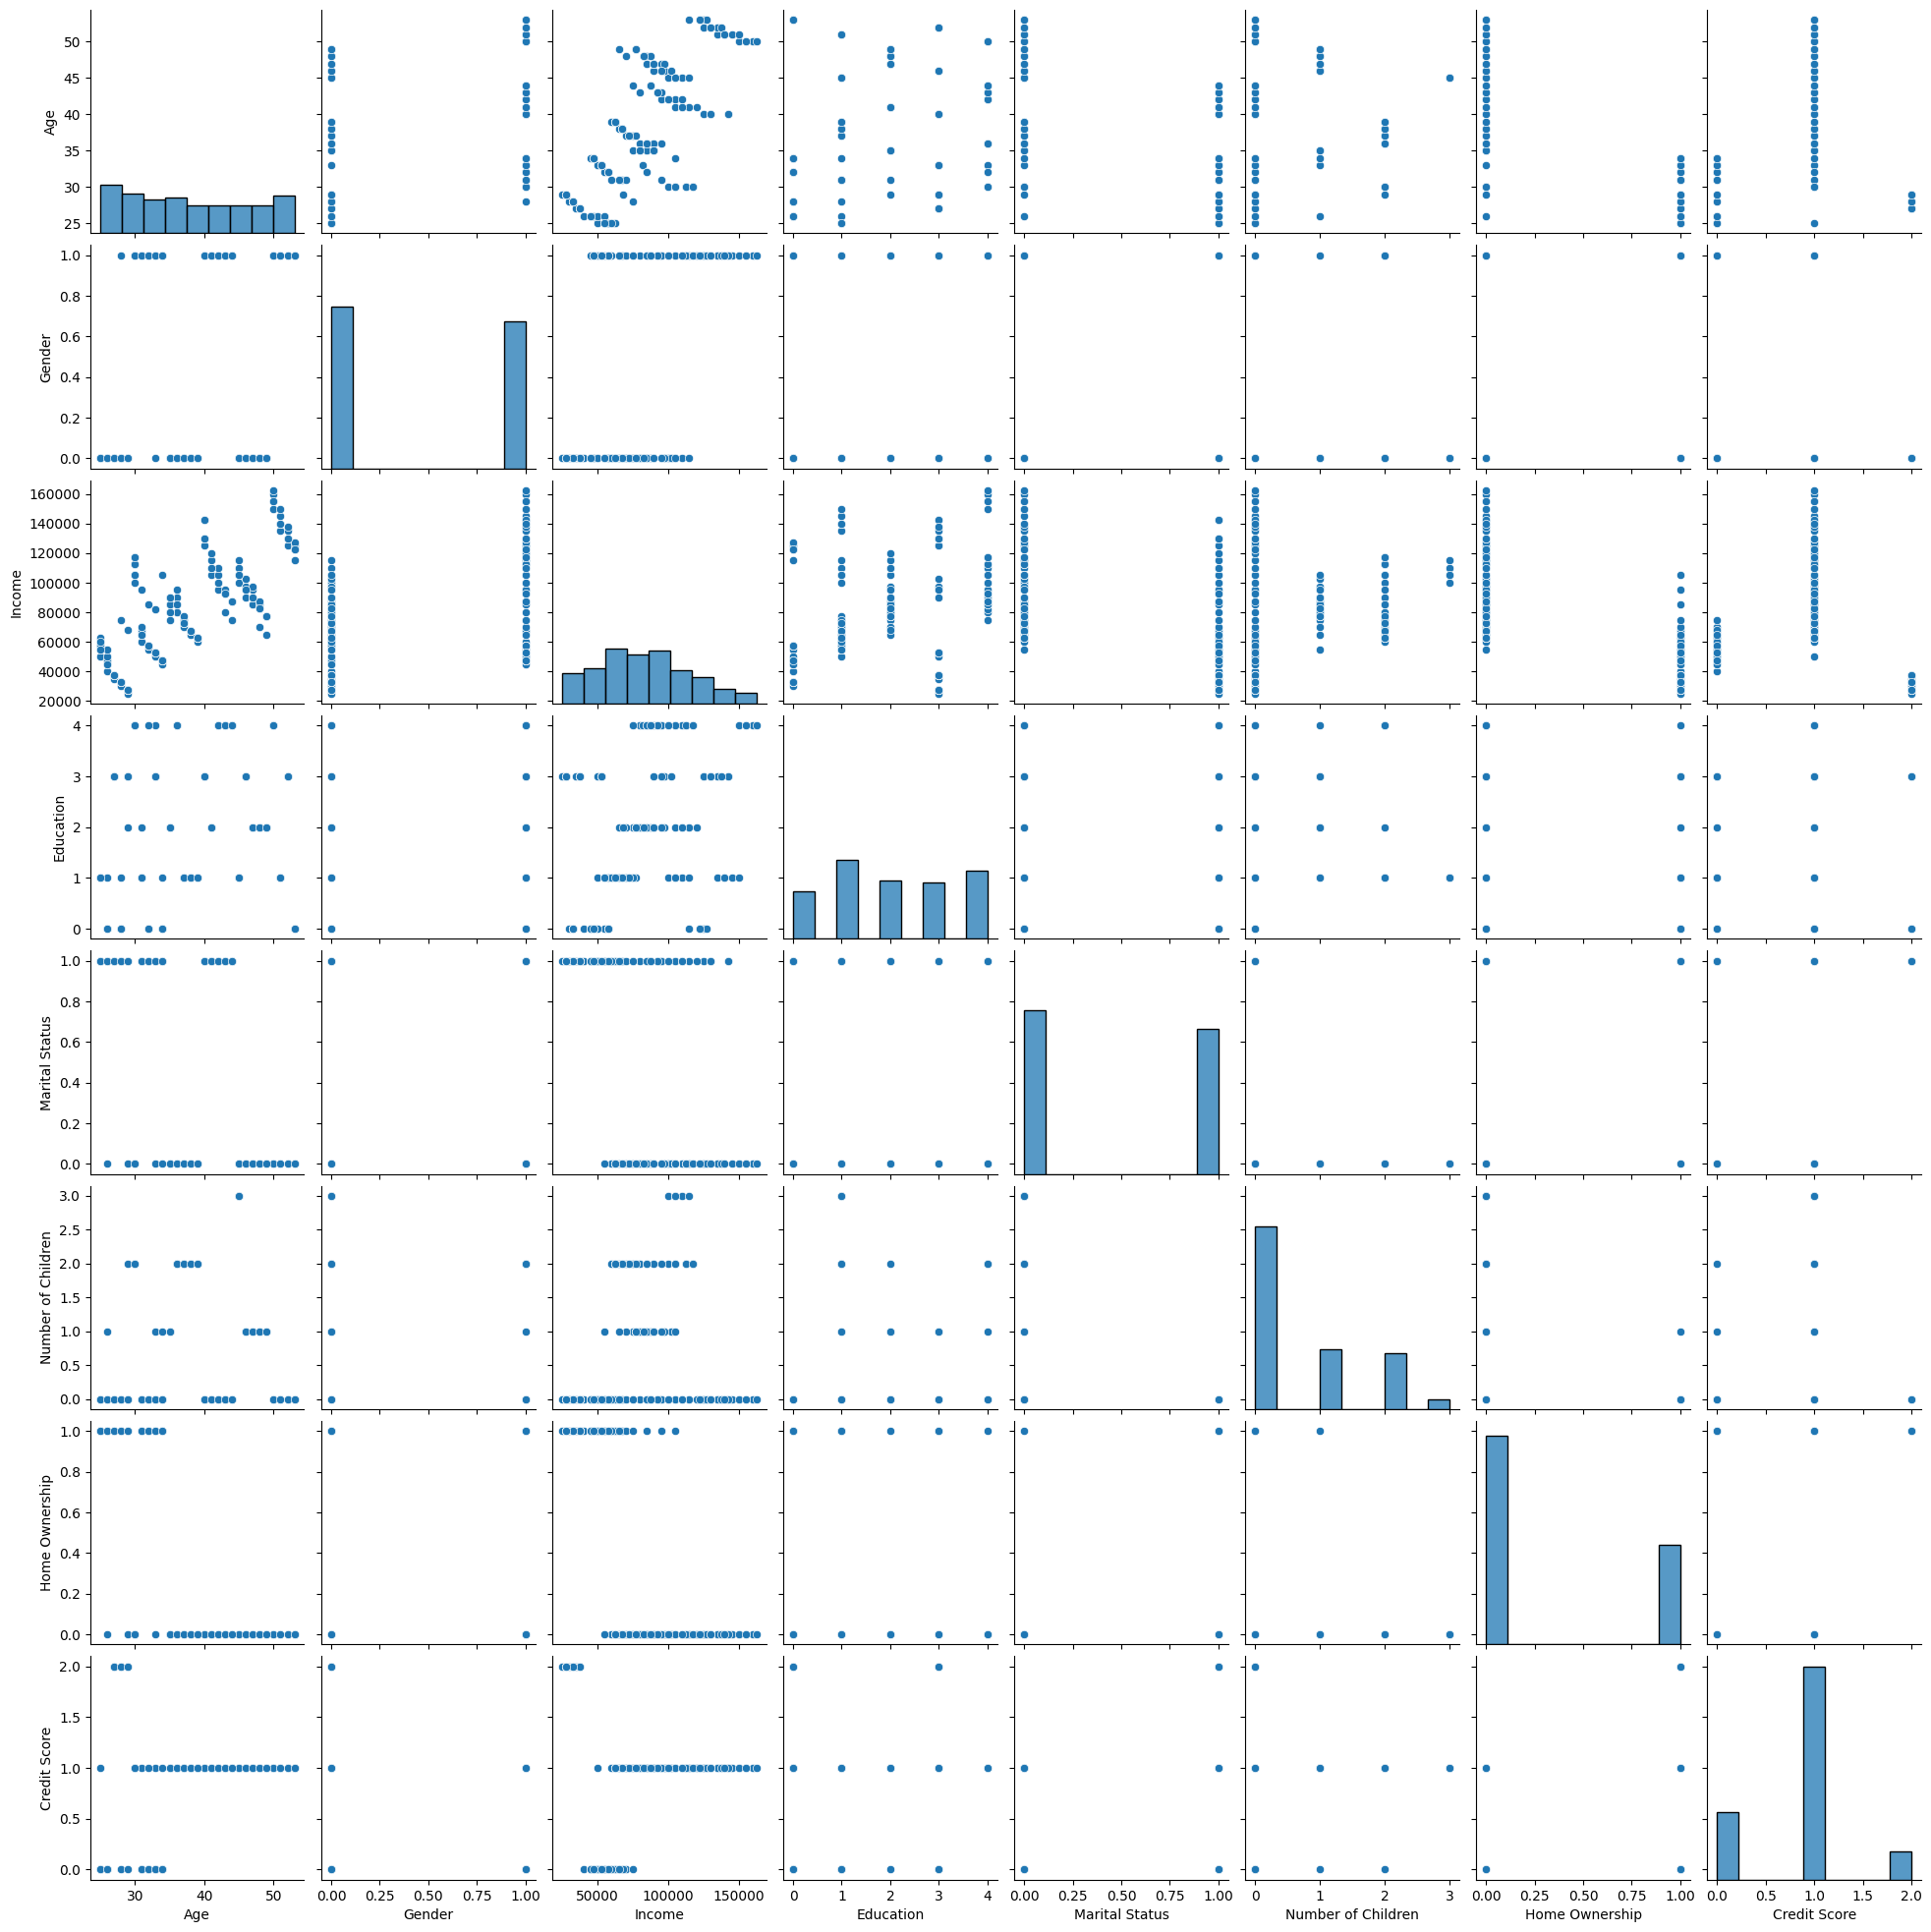

In [20]:
sns.pairplot(df_original)

In [21]:
df_original.corr()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
Age,1.000000,0.235343,0.699464,0.170254,-0.517723,0.055390,-0.713803,0.205362
Gender,0.235343,1.000000,0.495738,0.248671,0.278362,-0.442139,-0.031519,-0.247729
Income,0.699464,0.495738,1.000000,0.369449,-0.471004,0.084547,-0.704928,0.083698
Education,0.170254,0.248671,0.369449,1.000000,-0.067797,0.047311,-0.397043,0.334424
Marital Status,-0.517723,0.278362,-0.471004,-0.067797,1.000000,-0.696984,0.708374,-0.205756
Number of Children,0.055390,-0.442139,0.084547,0.047311,-0.696984,1.000000,-0.497129,0.136517
Home Ownership,-0.713803,-0.031519,-0.704928,-0.397043,0.708374,-0.497129,1.000000,-0.293384
Credit Score,0.205362,-0.247729,0.083698,0.334424,-0.205756,0.136517,-0.293384,1.000000


We can see the slightly positive correlation between Education and Credit Score

## Analyzing on target column values 'Credit Score'


In [32]:
df_original['Credit Score'].value_counts()

1    113
0     36
2     15
Name: Credit Score, dtype: int64

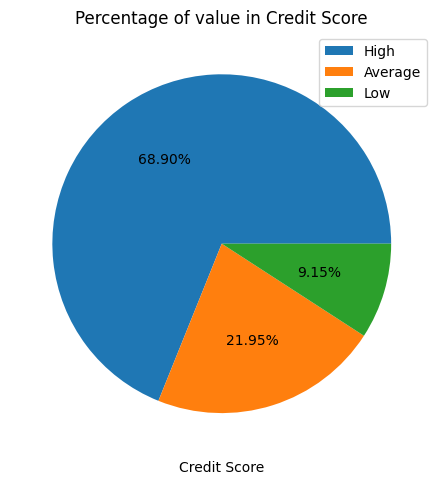

In [31]:
plt.figure(figsize = (5.5,5.5))
plt.pie(df_original['Credit Score'].value_counts(), autopct = '%1.2f%%')
plt.title('Percentage of value in Credit Score')
plt.xlabel('Credit Score')
plt.legend(df['Credit Score'].unique())
plt.show()

There is a significant imbalance between 3 unique values in column Credit Score. I need to address this issue by 3 methods later. I will try 3 methods to find out which is the good method for this dataset

### Method 1: Undersampling


In [115]:
df_original['Credit Score'].value_counts()

1    113
0     36
2     15
Name: Credit Score, dtype: int64

In [5]:
under_count_0 = df_original[df_original['Credit Score'] == 0]
under_count_1 = df_original[df_original['Credit Score'] == 1]
under_count_2 = df_original[df_original['Credit Score'] == 2]
undersample_size = 15
undersample_count_0 = under_count_0.sample(undersample_size, random_state = 0)
undersample_count_1 = under_count_1.sample(undersample_size, random_state = 1)

In [6]:
print('Credit 0: ',undersample_count_0.shape)
print('Credit 1: ',undersample_count_1.shape)
print('Credit 2: ',under_count_2.shape)

Credit 0:  (15, 8)
Credit 1:  (15, 8)
Credit 2:  (15, 8)


In [7]:
under_df = pd.concat([undersample_count_0, undersample_count_1, under_count_2], axis = 0, ignore_index = True)
under_df.shape

(45, 8)

In [7]:
under_df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

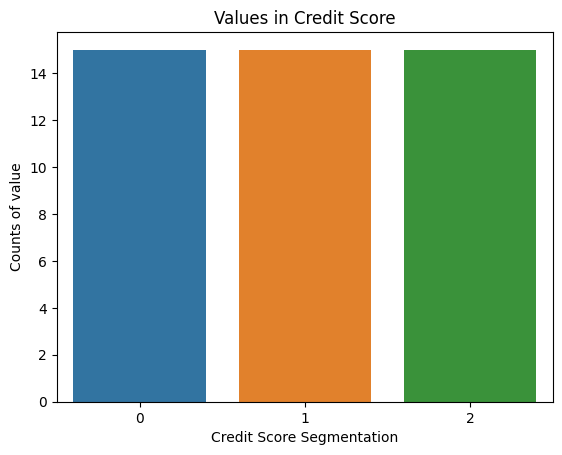

In [125]:
sns.barplot(x = under_df['Credit Score'].unique(), y = under_df['Credit Score'].value_counts())
plt.title('Values in Credit Score')
plt.xlabel('Credit Score Segmentation')
plt.ylabel('Counts of value')
plt.show()

### Method 2: Oversampling

In [8]:
df_original['Credit Score'].value_counts()

1    113
0     36
2     15
Name: Credit Score, dtype: int64

In [9]:
over_count_0 = df_original[df_original['Credit Score'] == 0]
over_count_1 = df_original[df_original['Credit Score'] == 1]
over_count_2 = df_original[df_original['Credit Score'] == 2]
oversample_size = 113
oversample_count_0 = over_count_0.sample(oversample_size, random_state = 0, replace = True)
oversample_count_2 = over_count_2.sample(oversample_size, random_state = 2, replace = True)

In [10]:
print('Credit 0: ',oversample_count_0.shape)
print('Credit 1: ',over_count_1.shape)
print('Credit 2: ',oversample_count_2.shape)

Credit 0:  (113, 8)
Credit 1:  (113, 8)
Credit 2:  (113, 8)


In [11]:
over_df = pd.concat([oversample_count_0, over_count_1, oversample_count_2], axis = 0, ignore_index = True)
over_df.shape

(339, 8)

In [12]:
over_df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

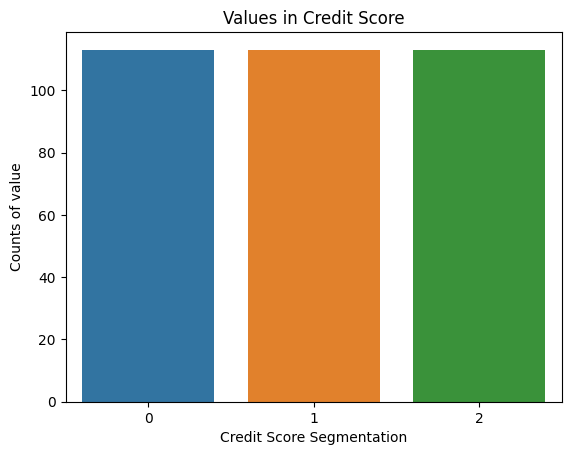

In [139]:
sns.barplot(x = over_df['Credit Score'].unique(), y = over_df['Credit Score'].value_counts())
plt.title('Values in Credit Score')
plt.xlabel('Credit Score Segmentation')
plt.ylabel('Counts of value')
plt.show()

### Method 3: SMOTE

In [140]:
df_original['Credit Score'].value_counts()

1    113
0     36
2     15
Name: Credit Score, dtype: int64

In [13]:
!pip install imblearn
from imblearn.over_sampling import SMOTE


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
sm = SMOTE(sampling_strategy = 'all', random_state = 3)
X = df_original.drop('Credit Score', axis = 1)
y = df_original['Credit Score']
X_sm, y_sm = sm.fit_resample(X, y)
sm_df = pd.DataFrame(X_sm, columns = df_original.columns)
sm_df['Credit Score'] = y_sm
sm_df.shape

(339, 8)

In [13]:
sm_df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

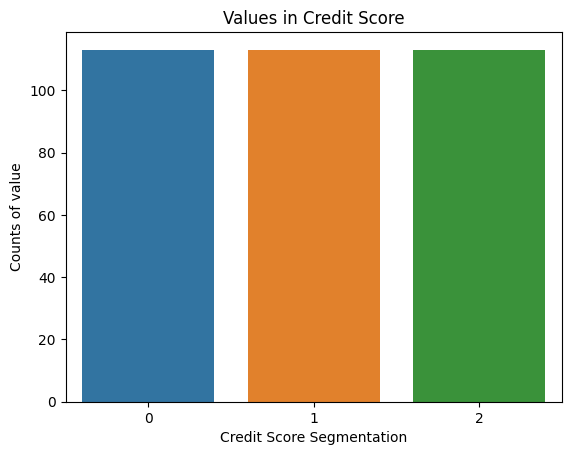

In [163]:
sns.barplot(x = sm_df['Credit Score'].unique(), y = sm_df['Credit Score'].value_counts())
plt.title('Values in Credit Score')
plt.xlabel('Credit Score Segmentation')
plt.ylabel('Counts of value')
plt.show()

## Preprocessing model machine learning

### For Method 1: Undersampling

In [15]:
X_under = under_df.drop(['Credit Score'], axis = 1)
y_under = under_df['Credit Score']
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.2, random_state = 10)

In [16]:
sc = StandardScaler()
X_train_under = sc.fit_transform(X_train_under)
X_test_under = sc.transform(X_test_under)

### For Method 2: Oversampling

In [17]:
X_over = over_df.drop(['Credit Score'], axis = 1)
y_over = over_df['Credit Score']
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 10)

In [18]:
sc = StandardScaler()
X_train_over = sc.fit_transform(X_train_over)
X_test_over = sc.transform(X_test_over)

### For Method 3: SMOTE

In [19]:
X_sm = sm_df.drop(['Credit Score'], axis = 1)
y_sm = sm_df['Credit Score']
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 10)

In [20]:
sc = StandardScaler()
X_train_sm = sc.fit_transform(X_train_sm)
X_test_sm = sc.transform(X_test_sm)

## Building model run on 3 methods

In [27]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()
xgb = XGBClassifier()

In [29]:
models = [lr, dtc, rfc, gbc, knn, svc, gnb, xgb]

### Method 1: Undersampling

In [51]:
for model in models:
    model.fit(X_train_under, y_train_under)
    y_pred_under = model.predict(X_test_under)
    Classfication_rp = classification_report(y_test_under, y_pred_under)
    print('------------------------------------------------------')
    print(type(model).__name__)
    print(Classification_rp)
    print(confusion_matrix(y_test_under, y_pred_under))

------------------------------------------------------
LogisticRegression
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        22

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68

[[2 0 0]
 [0 3 0]
 [0 0 4]]
------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        22

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68

[[2 0 0]
 [1 2 0]
 [0 0 4]]
------------------------------

For this undersampling method, we see all models give good outcomes.

### Method 2: Oversampling

In [52]:
for model in models:
    model.fit(X_train_over, y_train_over)
    y_pred_over = model.predict(X_test_over)
    Classification_rp = classification_report(y_test_over, y_pred_over)
    print('------------------------------------------------------')
    print(type(model).__name__)
    print(Classification_rp)
    print(confusion_matrix(y_test_over, y_pred_over))

------------------------------------------------------
LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.96      0.89      0.93        28
           2       1.00      1.00      1.00        21

    accuracy                           0.94        68
   macro avg       0.94      0.95      0.94        68
weighted avg       0.94      0.94      0.94        68

[[18  1  0]
 [ 3 25  0]
 [ 0  0 21]]
------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.93      0.96        28
           2       1.00      1.00      1.00        21

    accuracy                           0.97        68
   macro avg       0.97      0.98      0.97        68
weighted avg       0.97      0.97      0.97        68

[[19  0  0]
 [ 2 26  0]
 [ 0  0 21]]
------------

With Oversampling method, although models can give out good outcomes, we clearly see that the outcomes are not as good as in comparision with Undersampling method. In this sample method, XG Boost Classifier is the best performance model.

### Method 3: SMOTE

In [53]:
for model in models:
    model.fit(X_train_sm, y_train_sm)
    y_pred_sm = model.predict(X_test_sm)
    Classification_rp = classification_report(y_test_sm, y_pred_sm)
    print('------------------------------------------------------')
    print(type(model).__name__)
    print(Classification_rp)
    print(confusion_matrix(y_test_sm, y_pred_sm))

------------------------------------------------------
LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       1.00      0.95      0.97        19
           2       0.96      1.00      0.98        22

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

[[26  0  1]
 [ 1 18  0]
 [ 0  0 22]]
------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        22

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.98        68
weighted avg       0.99      0.99      0.99        68

[[27  0  0]
 [ 1 18  0]
 [ 0  0 22]]
------------

In SMOTE method, all models give very good results, possibly on par with method Undersampling. Particularly, the XGB model across the three methods consistently gives the best outcomes among the models, and in this method, XGB achieves the best performance in all three runs.

## In Conclusion

This is really an interesting project that I have done. After analyzing, I give the following two conclusions: 
- About the method of handling imbalanced data: I recommend choosing the SMOTE method 
- About the machine learning model: I recommend choosing the XG Boost Classifier model

Thank you for reading my personal project

Author: Bao Thai
